In [13]:
import os
import sys
import time
import scipy.io as sio
import numpy as np
import scipy
import keras
import PIL.Image as Image
from sklearn.utils import shuffle

In [14]:
uPavia = sio.loadmat('D:\\DEVANG_DATA\\EE_297_PROJECT\\TransferLearning\\pavia\\PaviaU.mat')
gt_uPavia = sio.loadmat('D:\\DEVANG_DATA\\EE_297_PROJECT\\TransferLearning\\pavia\\PaviaU_gt.mat')
data_IN = uPavia['paviaU']
gt_IN = gt_uPavia['paviaU_gt']
print (data_IN.shape)

(610, 340, 103)


In [15]:
print(np.prod(gt_IN.shape[:2]))

207400


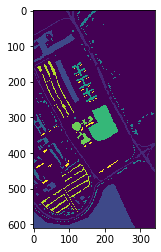

In [16]:
import matplotlib.pyplot as plt
plt.imshow(gt_IN,)

In [17]:
np.sum(np.unique(gt_IN, return_counts=True)[1])

207400

In [18]:
np.unique(gt_IN, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([164624,   6631,  18649,   2099,   3064,   1345,   5029,   1330,
          3682,    947], dtype=int64))

In [19]:
len(gt_IN)

610

In [20]:
len(gt_IN[1])

340

In [21]:
type(gt_IN[0][0])

numpy.uint8

In [22]:
binary_gt =  np.empty([610, 340], dtype=np.uint8)
for i in range(len(gt_IN)):
    for j in range(len(gt_IN[0])):
        if gt_IN[i][j] == 0:
            binary_gt[i][j] = 0
        elif gt_IN[i][j] == 2:
            binary_gt[i][j] = 2
        else:
            binary_gt[i][j] = 1
np.unique(binary_gt, return_counts=True)

(array([0, 1, 2], dtype=uint8), array([164624,  24127,  18649], dtype=int64))

In [11]:
610*340 - 164624 - 18649

24127

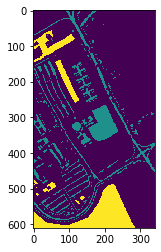

In [12]:
import matplotlib.pyplot as plt
plt.imshow(binary_gt)

In [13]:
binary_gt.shape

(610, 340)

# Stride 1 Cubes 50x50x103

In [14]:
# small_segmented = np.empty([157431,50,50,103],dtype=np.uint8)
small_segmented_1 = []
small_seg_gt_1 = []

for i in range(49,len(data_IN)):
    for j in range(49,len(data_IN[0])):
        values,counts = np.unique(binary_gt[(i-49):i+1, (j-49):j+1],return_counts=True)
        values,counts
        if len(values)==1 and values[0] != 0:
            small_segmented_1.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_1.append(values[0]-1)
        if len(values)==2 and values[0] != 0 and values[1] != 0:
            small_segmented_1.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_1.append(values[np.argmax(counts)] - 1)
        if len(values)==3 and counts[1]>counts[2]:
            small_segmented_1.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_1.append(values[1] - 1)
        if len(values)==3 and counts[1]<counts[2]:
            small_segmented_1.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_1.append(values[2] - 1)
        
small_segmented_1 = np.array(small_segmented_1)
small_seg_gt_1 = np.array(small_seg_gt_1)
small_segmented_1 =np.moveaxis(small_segmented_1, 3, 1)
small_segmented_1.shape, small_seg_gt_1.shape

((42858, 103, 50, 50), (42858,))

In [101]:
# small_segmented = np.empty([157431,50,50,103],dtype=np.uint8)
small_segmented_1 = []
small_seg_gt_1 = []

for i in range(4,len(data_IN),5):
    for j in range(4,len(data_IN[0]),5):
        values,counts = np.unique(gt_IN[(i-4):i+1, (j-4):j+1],return_counts=True)
        values,counts
        if len(values)==1 and values[0] != 0:
            small_segmented_1.append(np.asarray(data_IN[(i-4):i+1, (j-4):j+1,:]))
            small_seg_gt_1.append(values[0]-1)
        elif len(values)>=2 and values[0] == 0 :
            small_segmented_1.append(np.asarray(data_IN[(i-4):i+1, (j-4):j+1,:]))
            small_seg_gt_1.append(values[np.argmax(counts[1:]) + 1] - 1)
        elif len(values)>=2 and values[0] != 0:
            small_segmented_1.append(np.asarray(data_IN[(i-4):i+1, (j-4):j+1,:]))
            small_seg_gt_1.append(values[np.argmax(counts[1:])] - 1)
        
small_segmented_1 = np.array(small_segmented_1)
small_seg_gt_1 = np.array(small_seg_gt_1)
small_segmented_1 =np.moveaxis(small_segmented_1, 3, 1)
small_segmented_1.shape, small_seg_gt_1.shape

((3193, 103, 5, 5), (3193,))

In [14]:
# small_segmented = np.empty([157431,50,50,103],dtype=np.uint8)
small_segmented_1 = []
small_seg_gt_1 = []

for i in range(4,len(data_IN),5):
    for j in range(4,len(data_IN[0]),5):
        values,counts = np.unique(gt_IN[(i-4):i+1, (j-4):j+1],return_counts=True)
        values,counts
        if len(values)==1 and values[0] != 0:
            small_segmented_1.append(np.asarray(data_IN[(i-4):i+1, (j-4):j+1,:]))
            small_seg_gt_1.append(values[0])
        elif len(values)>=2 and values[0] == 0 :
            small_segmented_1.append(np.asarray(data_IN[(i-4):i+1, (j-4):j+1,:]))
            small_seg_gt_1.append(values[np.argmax(counts[1:]) + 1])
        elif len(values)>=2 and values[0] != 0:
            small_segmented_1.append(np.asarray(data_IN[(i-4):i+1, (j-4):j+1,:]))
            small_seg_gt_1.append(values[np.argmax(counts)])
        
small_segmented_1 = np.array(small_segmented_1)
small_seg_gt_1 = np.array(small_seg_gt_1)
small_segmented_1 =np.moveaxis(small_segmented_1, 3, 1)
small_segmented_1.shape, small_seg_gt_1.shape

((3193, 103, 5, 5), (3193,))

In [15]:
np.unique(small_seg_gt_1, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([598, 905, 186, 514, 107, 234,  95, 420, 134], dtype=int64))

In [16]:
small_segmented_1_38 = np.empty((len(small_segmented_1),38,5,5), dtype=np.uint8)
for i in range(len(small_segmented_1)):
    for j in range(38):
        if j < 32:
            small_segmented_1_38[i] = np.mean(small_segmented_1[i][j*3:(j+1)*3],axis=0)
        else:
            small_segmented_1_38[i] = small_segmented_1[i][96+j-32]

small_segmented_1_38.shape, small_seg_gt_1.shape

((3193, 38, 5, 5), (3193,))

# Stride 5 Cubes 50x50x103

In [14]:
# small_segmented = np.empty([157431,50,50,103],dtype=np.uint8)
small_segmented_5 = []
small_seg_gt_5 = []

for i in range(49,len(data_IN),5):
    for j in range(49,len(data_IN[0]),5):
        values,counts = np.unique(binary_gt[(i-49):i+1, (j-49):j+1],return_counts=True)
        values,counts
        if len(values)==1 and values[0] != 0:
            small_segmented_5.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_5.append(values[0]-1)
        if len(values)==2 and values[0] != 0 and values[1] != 0:
            small_segmented_5.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_5.append(values[np.argmax(counts)] - 1)
        if len(values)==3 and counts[1]>counts[2]:
            small_segmented_5.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_5.append(values[1] - 1)
        if len(values)==3 and counts[1]<counts[2]:
            small_segmented_5.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_5.append(values[2] - 1)
        
small_segmented_5 = np.array(small_segmented_5)
small_seg_gt_5 = np.array(small_seg_gt_5)
small_segmented_5 =np.moveaxis(small_segmented_5, 3, 1)
small_segmented_5.shape, small_seg_gt_5.shape

((1754, 103, 50, 50), (1754,))

In [15]:
small_segmented_5_38 = np.empty((len(small_segmented_5),38,50,50), dtype=np.uint8)
for i in range(len(small_segmented_5)):
    for j in range(38):
        if j < 32:
            small_segmented_5_38[i] = np.mean(small_segmented_5[i][j*3:(j+1)*3],axis=0)
        else:
            small_segmented_5_38[i] = small_segmented_5[i][96+j-32]

small_segmented_5_38.shape, small_seg_gt_5.shape

((1754, 38, 50, 50), (1754,))

# Stride 10 Cubes 50x50x103

In [16]:
# small_segmented = np.empty([157431,50,50,103],dtype=np.uint8)
small_segmented_10 = []
small_seg_gt_10 = []
 
for i in range(49,len(data_IN),10):
    for j in range(49,len(data_IN[0]),10):
        values,counts = np.unique(binary_gt[(i-49):i+1, (j-49):j+1],return_counts=True)
        values,counts
        if len(values)==1 and values[0] != 0:
            small_segmented_10.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_10.append(values[0]-1)
        if len(values)==2 and values[0] != 0 and values[1] != 0:
            small_segmented_10.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_10.append(values[np.argmax(counts)] - 1)
        if len(values)==3 and counts[1]>counts[2]:
            small_segmented_10.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_10.append(values[1] - 1)
        if len(values)==3 and counts[1]<counts[2]:
            small_segmented_10.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_10.append(values[2] - 1)
            
small_segmented_10 = np.array(small_segmented_10)
small_seg_gt_10 = np.array(small_seg_gt_10)
small_segmented_10 =np.moveaxis(small_segmented_10, 3, 1)
small_segmented_10.shape, small_seg_gt_10.shape

((452, 103, 50, 50), (452,))

In [17]:
small_segmented_10_38 = np.empty((len(small_segmented_10),38,50,50), dtype=np.uint8)
for i in range(len(small_segmented_10)):
    for j in range(38):
        if j < 32:
            small_segmented_10_38[i] = np.mean(small_segmented_10[i][j*3:(j+1)*3],axis=0)
        else:
            small_segmented_10_38[i] = small_segmented_10[i][96+j-32]

small_segmented_10_38.shape, small_seg_gt_10.shape

((452, 38, 50, 50), (452,))

# Stride 25 Cubes 50x50x103

In [18]:
# small_segmented = np.empty([157431,50,50,103],dtype=np.uint8)
small_segmented_25 = []
small_seg_gt_25 = []

for i in range(49,len(data_IN),25):
    for j in range(49,len(data_IN[0]),25):
        values,counts = np.unique(binary_gt[(i-49):i+1, (j-49):j+1],return_counts=True)
        values,counts
        if len(values)==1 and values[0] != 0:
            small_segmented_25.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_25.append(values[0]-1)
        if len(values)==2 and values[0] != 0 and values[1] != 0:
            small_segmented_25.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_25.append(values[np.argmax(counts)] - 1)
        if len(values)==3 and counts[1]>counts[2]:
            small_segmented_25.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_25.append(values[1] - 1)
        if len(values)==3 and counts[1]<counts[2]:
            small_segmented_25.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_25.append(values[2] - 1)
        
small_segmented_25 = np.array(small_segmented_25)
small_seg_gt_25 = np.array(small_seg_gt_25)
small_segmented_25 =np.moveaxis(small_segmented_25, 3, 1)
small_segmented_25.shape, small_seg_gt_25.shape

((78, 103, 50, 50), (78,))

In [19]:
small_segmented_25_38 = np.empty((len(small_segmented_25),38,50,50), dtype=np.uint8)
for i in range(len(small_segmented_25)):
    for j in range(38):
        if j < 32:
            small_segmented_25_38[i] = np.mean(small_segmented_25[i][j*3:(j+1)*3],axis=0)
        else:
            small_segmented_25_38[i] = small_segmented_25[i][96+j-32]

small_segmented_25_38.shape, small_seg_gt_25.shape

((78, 38, 50, 50), (78,))

# Stride 50 Cubes 50x50x103

In [87]:
# small_segmented = np.empty([157431,50,50,103],dtype=np.uint8)
small_segmented_50 = []
small_seg_gt_50 = []

for i in range(49,len(data_IN),50):
    for j in range(49,len(data_IN[0]),50):
        values,counts = np.unique(binary_gt[(i-49):i+1, (j-49):j+1],return_counts=True)
        values,counts
        if len(values)==1 and values[0] != 0:
            small_segmented_50.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_50.append(values[0]-1)
        if len(values)==2 and values[0] != 0 and values[1] != 0:
            small_segmented_50.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_50.append(values[np.argmax(counts)] - 1)
        if len(values)==3 and counts[1]>counts[2]:
            small_segmented_50.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_50.append(values[1] - 1)
        if len(values)==3 and counts[1]<counts[2]:
            small_segmented_50.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_50.append(values[2] - 1)
small_segmented_50 = np.array(small_segmented_50)
small_seg_gt_50 = np.array(small_seg_gt_50)
small_segmented_50 =np.moveaxis(small_segmented_50, 3, 1)
small_segmented_50.shape, small_seg_gt_50.shape

((1754, 103, 50, 50), (1754,))

In [14]:
# small_segmented = np.empty([157431,50,50,103],dtype=np.uint8)
small_segmented_50 = []
small_seg_gt_50 = []

for i in range(49,len(data_IN),5):
    for j in range(49,len(gt_IN[0]),5):
        values,counts = np.unique(gt_IN[(i-49):i+1, (j-49):j+1],return_counts=True)
        values,counts
        if len(values)==1 and values[0] != 0:
            small_segmented_50.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_50.append(values[0])
        if len(values)>=2 and values[0] != 0:
            small_segmented_50.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_50.append(values[np.argmax(counts)])
        if len(values)>=2 and values[0] == 0:
            small_segmented_50.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_50.append(values[np.argmax(counts[1:])+1])
        if len(values)==3 and counts[1]<counts[2]:
            small_segmented_50.append(np.asarray(data_IN[(i-49):i+1, (j-49):j+1,:]))
            small_seg_gt_50.append(values[2] - 1)
small_segmented_50 = np.array(small_segmented_50)
small_seg_gt_50 = np.array(small_seg_gt_50)
small_segmented_50 =np.moveaxis(small_segmented_50, 3, 1)
small_segmented_50.shape, small_seg_gt_50.shape

((6175, 103, 50, 50), (6175,))

In [15]:
small_segmented_50_38 = np.empty((len(small_segmented_50),38,50,50), dtype=np.uint8)
for i in range(len(small_segmented_50)):
    for j in range(38):
        if j < 32:
            small_segmented_50_38[i] = np.mean(small_segmented_50[i][j*3:(j+1)*3],axis=0)
        else:
            small_segmented_50_38[i] = small_segmented_50[i][96+j-32]

small_segmented_50_38.shape, small_seg_gt_50.shape

((6175, 38, 50, 50), (6175,))

In [16]:
small_segmented_50_38.shape,small_seg_gt_50.shape

((6175, 38, 50, 50), (6175,))

In [17]:
np.unique(small_seg_gt_50, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1448, 1370,  574,  671,  319,  456,  389,  834,  114], dtype=int64))

In [18]:
small_segmented_50_38_s = shuffle(small_segmented_50_38)
small_seg_gt_50_s = shuffle(small_seg_gt_50)
small_segmented_50_38_s.shape,small_seg_gt_50_s.shape

((6175, 38, 50, 50), (6175,))

In [19]:
Xtrain = small_segmented_50_38_s[:int(np.floor(len(small_segmented_50_38_s)*0.8))]
Xtest = small_segmented_50_38_s[int(np.floor(len(small_segmented_50_38_s)*0.8)):]
Ytrain = small_seg_gt_50_s[:int(np.floor(len(small_seg_gt_50_s)*0.8))]
Ytest = small_seg_gt_50_s[int(np.floor(len(small_seg_gt_50_s)*0.8)):]

In [20]:
Ytrain

array([2, 2, 2, ..., 1, 3, 8])

In [21]:
np.unique(Ytrain, return_counts=True), np.unique(Ytest, return_counts=True)

((array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([1158, 1098,  463,  539,  247,  377,  303,  667,   88], dtype=int64)),
 (array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([290, 272, 111, 132,  72,  79,  86, 167,  26], dtype=int64)))

In [22]:
def norm(array):
    for i in range(len(array)):
        array[i] = (array[i]/np.max(array[i]))

    array = array.astype(np.uint16)
    return array

In [23]:
Xtrain = norm(Xtrain)
Xtest = norm(Xtest)
(np.min(Xtrain),np.max(Xtrain)),(np.min(Xtest),np.max(Xtest))

((0, 1), (0, 1))

In [24]:
Xtrain = np.expand_dims(Xtrain,axis=4) 
Xtest = np.expand_dims(Xtest,axis=4) 

In [25]:
Xtrain.shape, Xtest.shape

((4940, 38, 50, 50, 1), (1235, 38, 50, 50, 1))

In [26]:
Xtrain =np.moveaxis(Xtrain, 1, 3)
Xtest =np.moveaxis(Xtest, 1, 3)
Xtrain.shape, Xtest.shape

((4940, 50, 50, 38, 1), (1235, 50, 50, 38, 1))

In [27]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
Ytrain = Ytrain.reshape(len(Ytrain), 1)
Ytest = Ytest.reshape(len(Ytest),1)
Ytrain = onehot_encoder.fit_transform(Ytrain)
Ytest = onehot_encoder.fit_transform(Ytest)
Ytrain[0], Ytest[0]

C:\Users\devang1997\software\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\devang1997\software\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categori

(array([0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0.]))

In [28]:
Ytrain.shape

(4940, 9)

In [29]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding3D, BatchNormalization, Flatten, Conv3D, AveragePooling3D, MaxPooling3D, GlobalMaxPooling3D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from Resnet_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
from keras.regularizers import l2
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [30]:
def SR_Unit(X, filters, stage, block):

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3, F4 = filters
    
    # Save the input value
    X_shortcut = X
    print(X.shape)

    X = Conv3D(F1, (1, 1, 1), name = conv_name_base + '2a', kernel_regularizer=l2(0.000001), bias_regularizer=l2(0.00001), kernel_initializer = glorot_uniform(seed=0))(X)
    print(X.shape)
    print('--------')
    X = BatchNormalization(axis = 4, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    print(X.shape)

    X = Conv3D(F2, kernel_size = (3, 3, 1), strides = (2, 2, 1), name = conv_name_base + '2b', kernel_regularizer=l2(0.000001), bias_regularizer=l2(0.00001), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 4, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    print(X.shape)


    X = Conv3D(F3, kernel_size = (1, 1, 3), strides = (1, 1, 2), name = conv_name_base + '2c', kernel_regularizer=l2(0.000001), bias_regularizer=l2(0.00001), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 4, name = bn_name_base + '2c')(X)
    X = Activation('relu')(X)
    print(X.shape)

    
    
    X = Conv3D(F4, kernel_size = (1, 1, 1), name = conv_name_base + '2d', kernel_regularizer=l2(0.000001), bias_regularizer=l2(0.00001), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 4, name = bn_name_base + '2d')(X)
    print(X.shape)

    
    X_shortcut = Conv3D(filters = F4, kernel_size = (3, 3, 3), strides = (2,2,2), padding = 'valid', name = conv_name_base + '1', kernel_regularizer=l2(0.000001), bias_regularizer=l2(0.00001), kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 4, name = bn_name_base + '1')(X_shortcut)


    X = Add()([X, X_shortcut])
    print(X.shape)
    X = Activation('relu')(X)
    
    
    return X

In [31]:
def model(input_shape=(50, 50, 38, 1), classes=10):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)
    print(X_input.shape)
#     Zero-Padding
    X = ZeroPadding3D((3, 3, 3))(X_input)
    print(X.shape)

    # Stage 1
    X = Conv3D(32, (3, 3, 2), name='conv1',kernel_regularizer=l2(0.000001), bias_regularizer=l2(0.00001), kernel_initializer=glorot_uniform(seed=0))(X)
    print(X.shape)
    X = BatchNormalization(axis=4, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling3D((2, 2, 1), strides=None)(X)
    print(X.shape)
    # Stage 2
    F1 = 16
    X = SR_Unit(X, filters=[F1, F1, F1, F1], stage=2, block='a')
    print(X.shape)
    F2 = 32
    X = SR_Unit(X, filters=[F2, F2, F2, F2], stage=3, block='a')
    print(X.shape)
    F3 = 64
    X = SR_Unit(X, filters=[F3, F3, F3, F3], stage=4, block='a')
    print(X.shape)
    F4 = 128
#     X = SR_Unit(X, filters=[F4, F4, F4, F4], stage=5, block='a')
#     print(X.shape)

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = GlobalMaxPooling3D()(X)
    print(X.shape)
    ### END CODE HERE ###

    # output layer
#     X = Flatten()(X)
    X = Dense(classes, input_dim=256, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name="3D-SRNet")

    return model

In [32]:
model = model(input_shape = (50, 50, 38, 1), classes = 9)

(?, 50, 50, 38, 1)
(?, 56, 56, 44, 1)
(?, 54, 54, 43, 32)
(?, 27, 27, 43, 32)
(?, 27, 27, 43, 32)
(?, 27, 27, 43, 16)
11
(?, 27, 27, 43, 16)
(?, 13, 13, 43, 16)
(?, 13, 13, 21, 16)
(?, 13, 13, 21, 16)
(?, 13, 13, 21, 16)
(?, 13, 13, 21, 16)
(?, 13, 13, 21, 16)
(?, 13, 13, 21, 32)
11
(?, 13, 13, 21, 32)
(?, 6, 6, 21, 32)
(?, 6, 6, 10, 32)
(?, 6, 6, 10, 32)
(?, 6, 6, 10, 32)
(?, 6, 6, 10, 32)
(?, 6, 6, 10, 32)
(?, 6, 6, 10, 64)
11
(?, 6, 6, 10, 64)
(?, 2, 2, 10, 64)
(?, 2, 2, 4, 64)
(?, 2, 2, 4, 64)
(?, 2, 2, 4, 64)
(?, 2, 2, 4, 64)
(?, 64)


In [33]:
model.summary()

Model: "3D-SRNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 50, 38, 1 0                                            
__________________________________________________________________________________________________
zero_padding3d_1 (ZeroPadding3D (None, 56, 56, 44, 1 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv3D)                  (None, 54, 54, 43, 3 608         zero_padding3d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 54, 54, 43, 3 128         conv1[0][0]                      
___________________________________________________________________________________________

In [34]:
model.compile(optimizer= keras.optimizers.SGD(lr=0.01), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(Xtrain, Ytrain, epochs = 15, batch_size = 64)

Epoch 1/15
4940/4940 [==============================] - 33s 7ms/step - loss: 2.4971 - categorical_accuracy: 0.1745
Epoch 2/15
4940/4940 [==============================] - 24s 5ms/step - loss: 2.1077 - categorical_accuracy: 0.2427
Epoch 3/15
4940/4940 [==============================] - 24s 5ms/step - loss: 1.9083 - categorical_accuracy: 0.2990
Epoch 4/15
4940/4940 [==============================] - 24s 5ms/step - loss: 1.7565 - categorical_accuracy: 0.3547
Epoch 5/15
4940/4940 [==============================] - 24s 5ms/step - loss: 1.6422 - categorical_accuracy: 0.4061
Epoch 6/15
4940/4940 [==============================] - 24s 5ms/step - loss: 1.5448 - categorical_accuracy: 0.4530
Epoch 7/15
4940/4940 [==============================] - 24s 5ms/step - loss: 1.4472 - categorical_accuracy: 0.4913
Epoch 8/15
4940/4940 [==============================] - 24s 5ms/step - loss: 1.3617 - categorical_accuracy: 0.5423
Epoch 9/15
4940/4940 [==============================] - 24s 5ms/step - loss: 1.2

In [35]:
preds = model.evaluate(Xtest, Ytest)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1235/1235 [==============================] - 3s 3ms/step
Loss = 2.7274719854115475
Test Accuracy = 0.15465587046947557


In [36]:
y_pred = model.predict(Xtest)

In [37]:
import sklearn.metrics
confusion_matrix = sklearn.metrics.confusion_matrix(np.argmax(Ytest, axis=1), np.argmax(y_pred, axis=1))

In [38]:
confusion_matrix

array([[77, 55, 37, 42, 10, 19,  9, 39,  2],
       [75, 64, 24, 42,  7, 16,  7, 37,  0],
       [29, 26,  9, 20,  4,  9,  7,  7,  0],
       [36, 31, 12, 18,  3,  8,  5, 18,  1],
       [14, 18,  9, 12,  1,  5,  5,  8,  0],
       [27, 16,  7, 10,  0,  1,  3, 15,  0],
       [24, 29,  2,  7,  4,  6,  4, 10,  0],
       [48, 45, 10, 26,  3, 14,  3, 17,  1],
       [13,  2,  3,  4,  0,  1,  2,  1,  0]], dtype=int64)